<a href="https://colab.research.google.com/github/iqbalamo93/Clustering/blob/master/Seed_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
path_to_file = 'https://raw.githubusercontent.com/iqbalamo93/Datasets/master/seeds_dataset.txt'

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv(path_to_file,sep='\t',header=None,names=['Area','Perimeter','Compactness','Length','Width','Asymmetry','Length_groove','varieties'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Area           210 non-null    float64
 1   Perimeter      210 non-null    float64
 2   Compactness    210 non-null    float64
 3   Length         210 non-null    float64
 4   Width          210 non-null    float64
 5   Asymmetry      210 non-null    float64
 6   Length_groove  210 non-null    float64
 7   varieties      210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [5]:
df.head()

,Area,Perimeter,Compactness,Length,Width,Asymmetry,Length_groove,varieties
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [6]:
df['varieties'].unique()

array([1, 2, 3])

In [7]:
df.groupby('varieties')['varieties'].count()

varieties
1    70
2    70
3    70
Name: varieties, dtype: int64

In [8]:
df['Name'] = ['Kama' if x==1 else 'Rosa' if x==2 else 'Canadian' for x in df['varieties']]

In [9]:
df.head()

,Area,Perimeter,Compactness,Length,Width,Asymmetry,Length_groove,varieties,Name
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,Kama
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,Kama
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,Kama
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,Kama
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,Kama


In [ ]:
dc=df.iloc[:,:-2]

In [10]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [18]:
from sklearn.pipeline import make_pipeline

In [12]:
dc = scaler.fit_transform(dc)

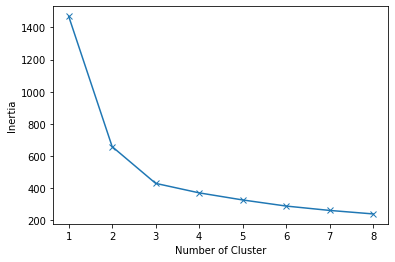

In [13]:
inertia  = []
for x in range(1,9):
  model =  KMeans(n_clusters=x, random_state=1)
  model.fit(dc)
  inertia.append(model.inertia_)
plt.plot(range(1,9),inertia,marker='x')
plt.xlabel('Number of Cluster')
plt.ylabel('Inertia')
plt.show()

In [23]:
model = KMeans(n_clusters=3)
pipeline = make_pipeline(scaler,model)
pipeline.fit(dc)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=3, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [24]:
labels = pipeline.predict(dc)
labels = pd.Series(labels,name='labels')
pd.crosstab(labels, df['Name'])

Name,Canadian,Kama,Rosa
labels,,,
0,66,6,0
1,0,2,65
2,4,62,5
